In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from WelfareMeasures import *
from functions_njit import tax_rate_fct
from bernoulli_distribution import Bernoulli
from help_functions_non_njit import *
from graph_format import *
# load local model file and initialize model class
from model import ModelClass
from scipy.optimize import minimize

# Load original model

In [2]:
model = ModelClass() # set a few number of periods.

par = model.par
sol = model.sol
sim = model.sim
par.opt_tol = 1e-6
par.opt_maxiter = 1000

%time model.solve(do_print=False)
%time model.simulate()

CPU times: total: 7min 49s
Wall time: 1min 17s
CPU times: total: 29.9 s
Wall time: 22.2 s


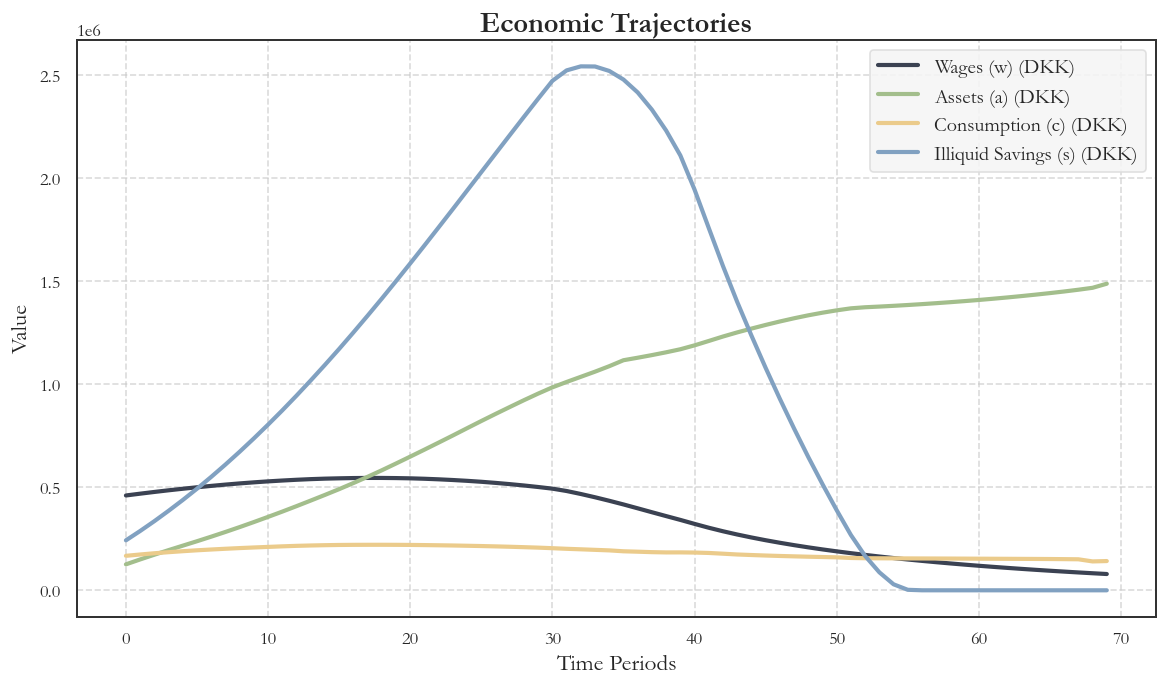

In [3]:
time = np.arange(par.T)
data_dict_basic = {
    "Wages (w)": {"data": np.mean(model.sim.w[:], axis=0), "unit": "DKK"},
    "Assets (a)": {"data": np.mean(model.sim.a[:], axis=0), "unit": "DKK"},
    "Consumption (c)": {"data": np.mean(model.sim.c[:], axis=0), "unit": "DKK"},
    "Illiquid Savings (s)": {"data": np.mean(model.sim.s[:], axis=0), "unit": "DKK"},
}

plot_simulation_one_graph(data_dict_basic, time, title="Economic Trajectories")

# Counter factual

In [4]:
# Change parameters and re-solve
# theta = [1.0]
# theta_names = ['alpha_f0']


# constant, beta1, beta2 = np.array([5.17959452e+00, 5.54957733e-01, 1.15837720e-04])
# time = np.arange(par.T)
# tau = np.maximum((constant + beta1*time + beta2*time**2) / 100, 0)


# theta = [tau]
# theta_names = ['tau']

theta = [36]
# theta = [-10.117360]
theta_names = ['retirement_age']


og_model, new_model =  make_new_model(model, theta, theta_names, do_print = False)


# Compare models 

c:\Users\peter\Desktop\Speciale\Design_retirement\WelfareMeasures.py:81: RuntimeWarning: Mean of empty slice
  sim_og_h = np.nanmean(sim_og_h_ex_1, axis=0)# age specific average
c:\Users\peter\Desktop\Speciale\Design_retirement\WelfareMeasures.py:82: RuntimeWarning: Mean of empty slice
  sim_new_h = np.nanmean(sim_new_h_ex_1, axis=0) # age specific average


[9400. 9411. 9457. 9377. 9390. 9410. 9388. 9388. 9377. 9355. 9328. 9343.
 9326. 9273. 9222. 9263. 9218. 9181. 9172. 9123. 9077. 9029. 8984. 8970.
 8888. 8816. 8754. 8712. 8631. 8544. 7346. 6148. 5410. 4693. 4044. 3451.
 2850. 2355. 1856.  604.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
[9400. 9411. 9457. 9377. 9390. 9410. 9388. 9388. 9377. 9355. 9328. 9343.
 9326. 9273. 9222. 9263. 9218. 9181. 9172. 9123. 9077. 9029. 8984. 8970.
 8888. 8816. 8754. 8712. 8631. 8544. 5689. 4360. 3725. 3112. 2636. 2161.
 1806. 1491. 1196.  316.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]


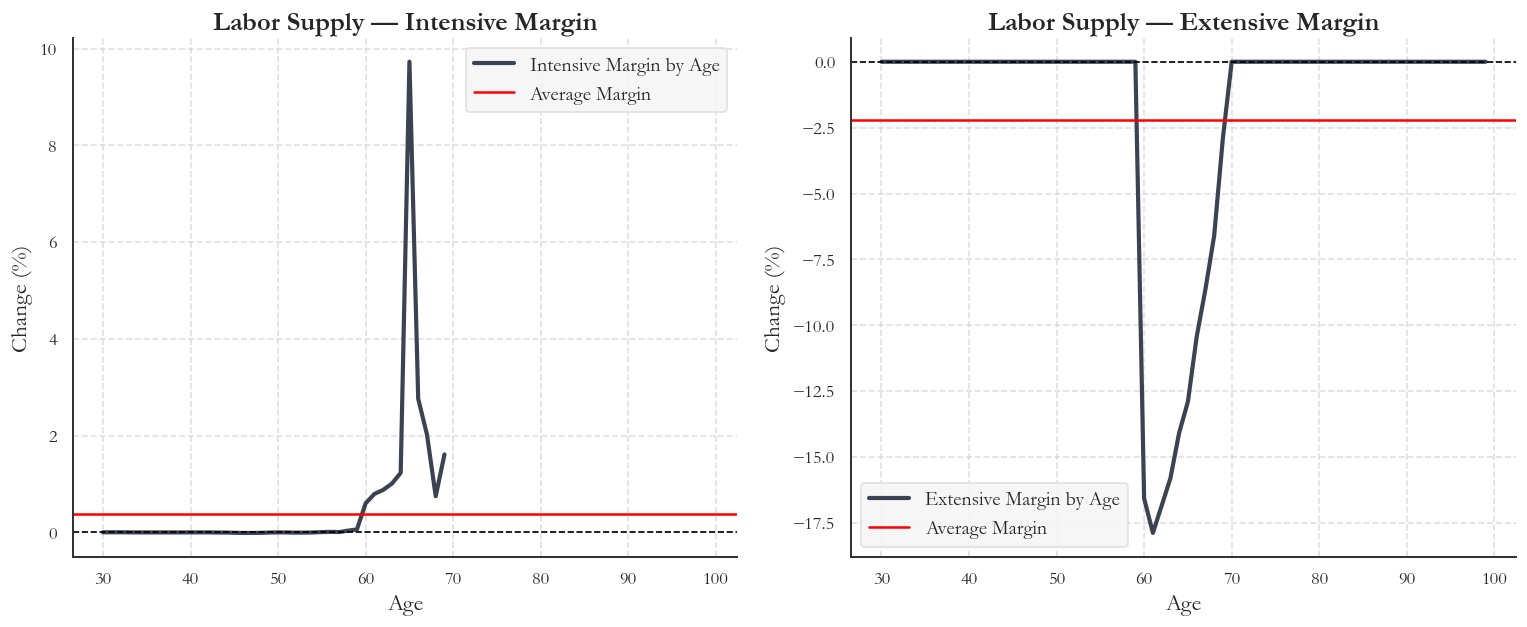

In [5]:
# Compare models 
# consumption_eq = find_consumption_equivalence(og_model, new_model, do_print= True, the_method = 'brentq')
intensive_margin, extensive_margin, intensive_margin_age, extensive_margin_age = labor_elasticity(og_model, new_model)


plot_labor_margins_by_age(
    intensive_age=intensive_margin_age,
    extensive_age=extensive_margin_age,
    avg_intensive=intensive_margin,
    avg_extensive=extensive_margin,
    age_start=par.start_age,
    title_prefix="Labor Supply — ",
    save_title="counterfactual_labor_margins_by_age.png"
)

In [6]:
np.argmax(np.sum(new_model.sim.ex[:,:], axis=0) - np.sum(og_model.sim.ex[:,:], axis=0))

0

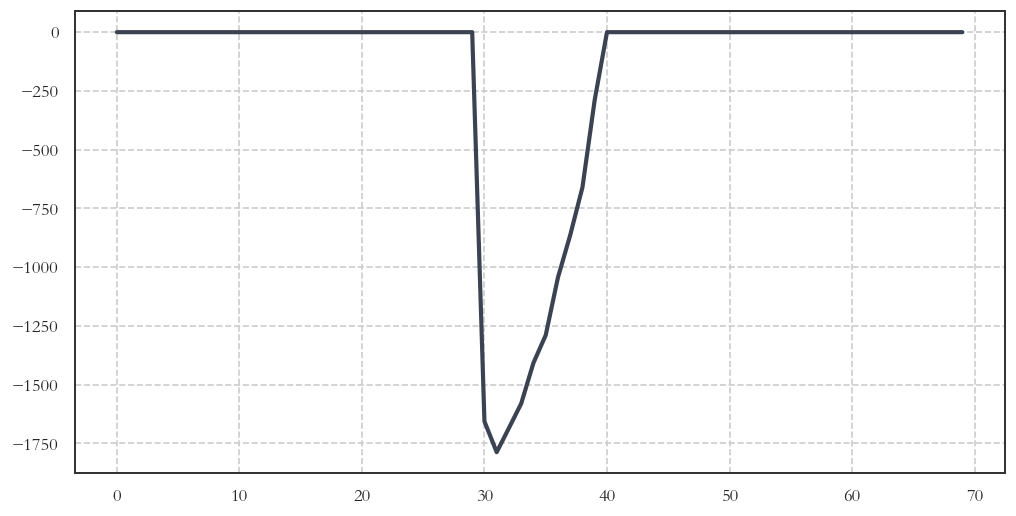

In [7]:
plt.plot(np.sum(new_model.sim.ex[:,:], axis=0) - np.sum(og_model.sim.ex[:,:], axis=0))

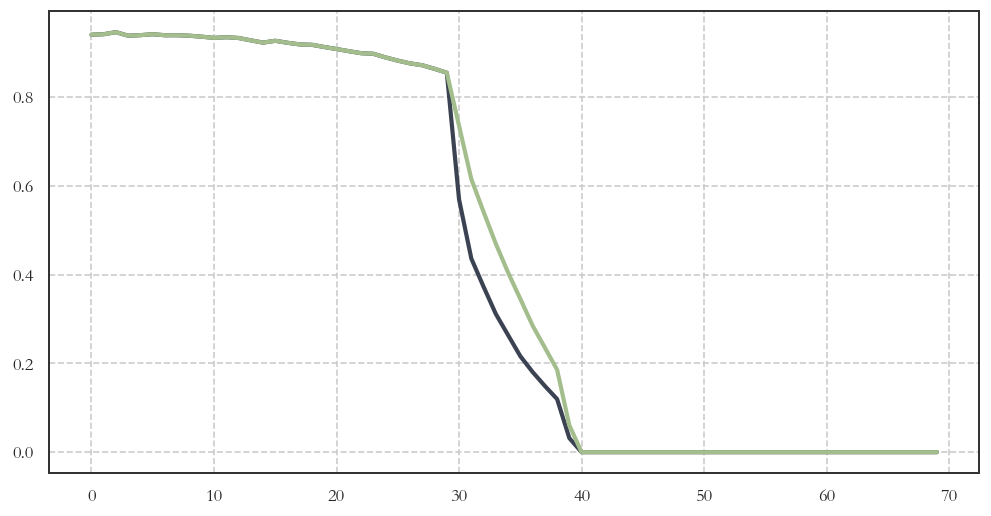

In [8]:
plt.plot(np.nanmean(new_model.sim.ex[:,:], axis=0))
plt.plot(np.nanmean(og_model.sim.ex[:,:], axis=0))

In [9]:
np.where(new_model.sim.ex[:, :] - og_model.sim.ex[:, :] > 0)

(array([ 340,  399,  414,  634,  901,  934, 1276, 1340, 2200, 2466, 2550,
        2661, 2707, 2771, 2902, 2946, 3187, 3251, 3720, 3755, 4310, 4589,
        4864, 5094, 5120, 5215, 5599, 5925, 5952, 6092, 6117, 6207, 6375,
        6619, 6684, 6792, 6973, 7033, 7057, 7164, 7165, 7212, 7562, 7711,
        8200, 8401, 8476, 8524, 8575, 8595, 8692, 8887, 8937, 9333, 9530,
        9717, 9803], dtype=int64),
 array([39, 39, 38, 39, 39, 33, 38, 39, 39, 39, 39, 39, 39, 37, 38, 39, 39,
        33, 31, 38, 39, 39, 39, 39, 39, 39, 39, 38, 33, 39, 39, 39, 39, 39,
        39, 39, 38, 39, 39, 38, 39, 36, 38, 36, 38, 39, 39, 36, 39, 38, 39,
        39, 39, 39, 38, 39, 39], dtype=int64))

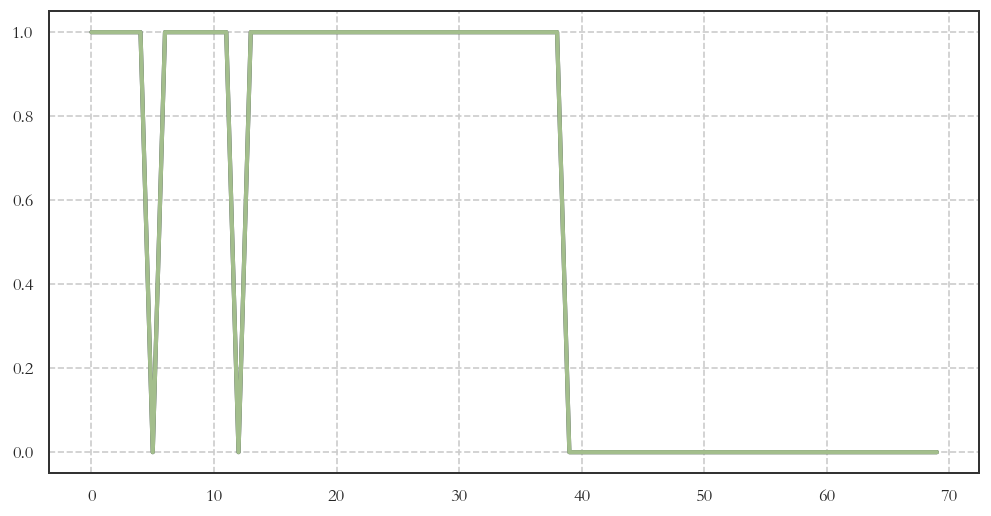

In [10]:
i = 2856

plt.plot(new_model.sim.ex[i, :])
plt.plot(og_model.sim.ex[i, :])


In [11]:
og_model.sim.e[2000, 33]

0.0

In [12]:
og_model.sim.ex[2000, 33]

0.0

In [13]:
t = 32

for i in range(10):
    for j in range(10):
        print( "diff", og_model.sol.V[t, :, i, j, t, 0] - og_model.sol.V[t, :, i, j, t, 2])

diff [-0.26865749 -0.15050242 -0.13088021 -0.09695752 -0.07760105 -0.06329984
 -0.05152643 -0.04132454 -0.03204803 -0.02294255]
diff [-0.26865749 -0.15050242 -0.13088021 -0.09695752 -0.07760105 -0.06329984
 -0.05152643 -0.04132454 -0.03204803 -0.02294255]
diff [-0.26865749 -0.15050242 -0.13088021 -0.09695752 -0.07760105 -0.06329984
 -0.05152643 -0.04132454 -0.03204803 -0.02294255]
diff [-0.26865749 -0.15050242 -0.13088021 -0.09695752 -0.07760105 -0.06329984
 -0.05152643 -0.04132454 -0.03204803 -0.02294255]
diff [-0.26865749 -0.15050242 -0.13088021 -0.09695752 -0.07760105 -0.06329984
 -0.05152643 -0.04132454 -0.03204803 -0.02294255]
diff [-0.26865749 -0.15050242 -0.13088021 -0.09695752 -0.07760105 -0.06329984
 -0.05152643 -0.04132454 -0.03204803 -0.02294255]
diff [-0.26865749 -0.15050242 -0.13088021 -0.09695752 -0.07760105 -0.06329984
 -0.05152643 -0.04132454 -0.03204803 -0.02294255]
diff [-0.26865749 -0.15050242 -0.13088021 -0.09695752 -0.07760105 -0.06329984
 -0.05152643 -0.04132454 -

In [14]:
t = 40


np.sum(new_model.sol.ex[t, :, :, :, t, 1] - og_model.sol.ex[t, :, :, :, t, 1])

0.0

In [15]:
t = 37

for i in range(10):
    for j in range(10):
        print(new_model.sol.ex[t, :, i, j, t, 1], og_model.sol.ex[t, :, i, j, t, 1], "diff", new_model.sol.ex[t, :, i, j, t, 1] - og_model.sol.ex[t, :, i, j, t, 1])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] diff [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] diff [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] diff [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] diff [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] diff [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] diff [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] diff [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] diff [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] diff [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] diff [0. 0. 0. 0. 0. 0. 0. 

In [16]:
np.sum(og_model.sim.xi - new_model.sim.xi)

0.0

In [17]:
np.sum(og_model.sim.e_state_exogenous - new_model.sim.e_state_exogenous)

0

In [18]:
t = 41
new_model.sol.ex[t, :, i, j, t, 1]

IndexError: index 41 is out of bounds for axis 4 with size 41

In [ ]:
new_model.par.p_e_2

# comparison of means

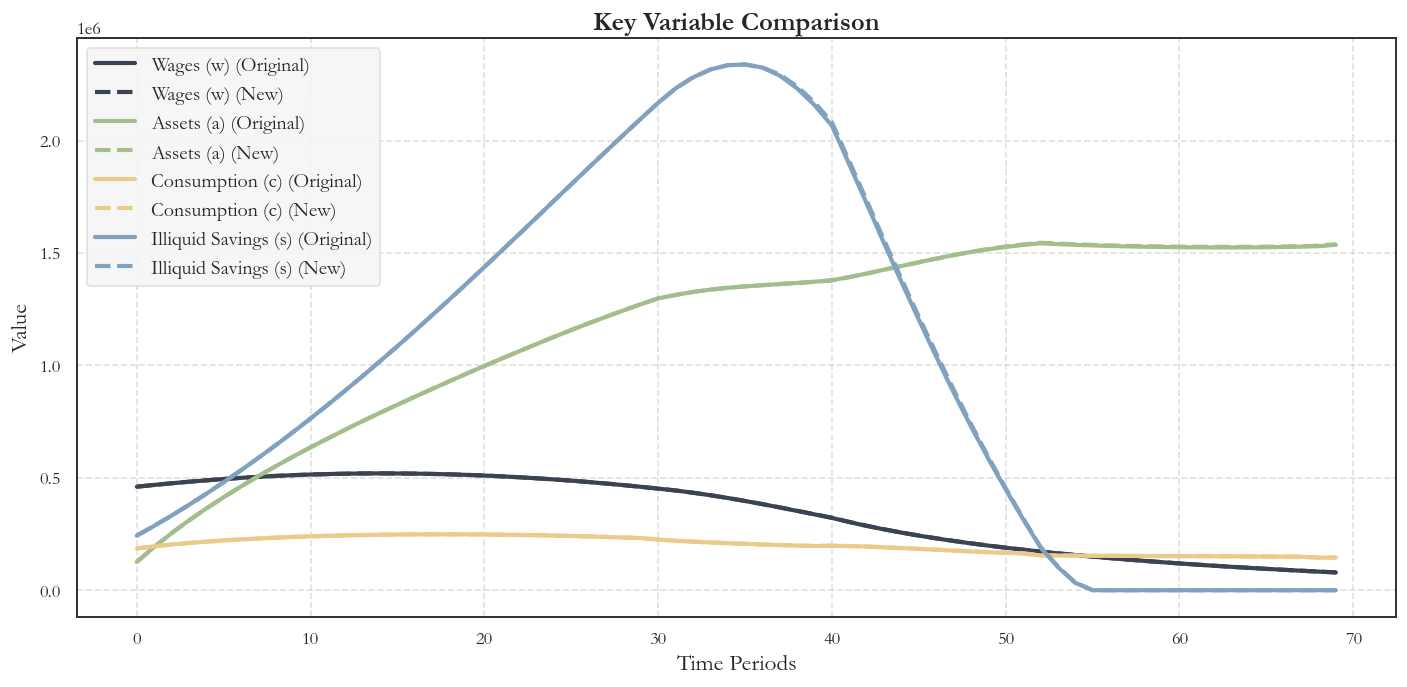

In [ ]:
time = np.arange(par.T)

# Data for selected summary variables
summary_vars = ["Wages (w)", "Assets (a)", "Consumption (c)", "Illiquid Savings (s)"]
simulated_data_new = {
    "Wages (w)": np.mean(new_model.sim.w[:], axis=0),
    "Assets (a)": np.mean(new_model.sim.a[:], axis=0),
    "Consumption (c)": np.mean(new_model.sim.c[:], axis=0),
    "Illiquid Savings (s)": np.mean(new_model.sim.s[:], axis=0),
}
simulated_data_og = {
    "Wages (w)": np.mean(og_model.sim.w[:], axis=0),
    "Assets (a)": np.mean(og_model.sim.a[:], axis=0),
    "Consumption (c)": np.mean(og_model.sim.c[:], axis=0),
    "Illiquid Savings (s)": np.mean(og_model.sim.s[:], axis=0),
}

plot_comparison_single_panel(simulated_data_og, simulated_data_new, summary_vars, time, save_title="counterfactual_summary_vars.png")


C:\Users\peter\AppData\Local\Temp\ipykernel_18512\65369719.py:5: RuntimeWarning: Mean of empty slice
  "Hours (hours)": np.nanmean(np.where(new_model.sim.ex == 1, new_model.sim.h, np.nan), axis=0),
C:\Users\peter\AppData\Local\Temp\ipykernel_18512\65369719.py:17: RuntimeWarning: Mean of empty slice
  "Hours (hours)": np.nanmean(np.where(og_model.sim.ex == 1, og_model.sim.h, np.nan), axis=0),
C:\Users\peter\AppData\Local\Temp\ipykernel_18512\65369719.py:29: RuntimeWarning: Mean of empty slice
  "Hours (hours)": np.nanmean(np.where(new_model.sim.ex == 1, new_model.sim.h, np.nan), axis=0)
C:\Users\peter\AppData\Local\Temp\ipykernel_18512\65369719.py:30: RuntimeWarning: Mean of empty slice
  - np.nanmean(np.where(og_model.sim.ex == 1, og_model.sim.h, np.nan), axis=0),


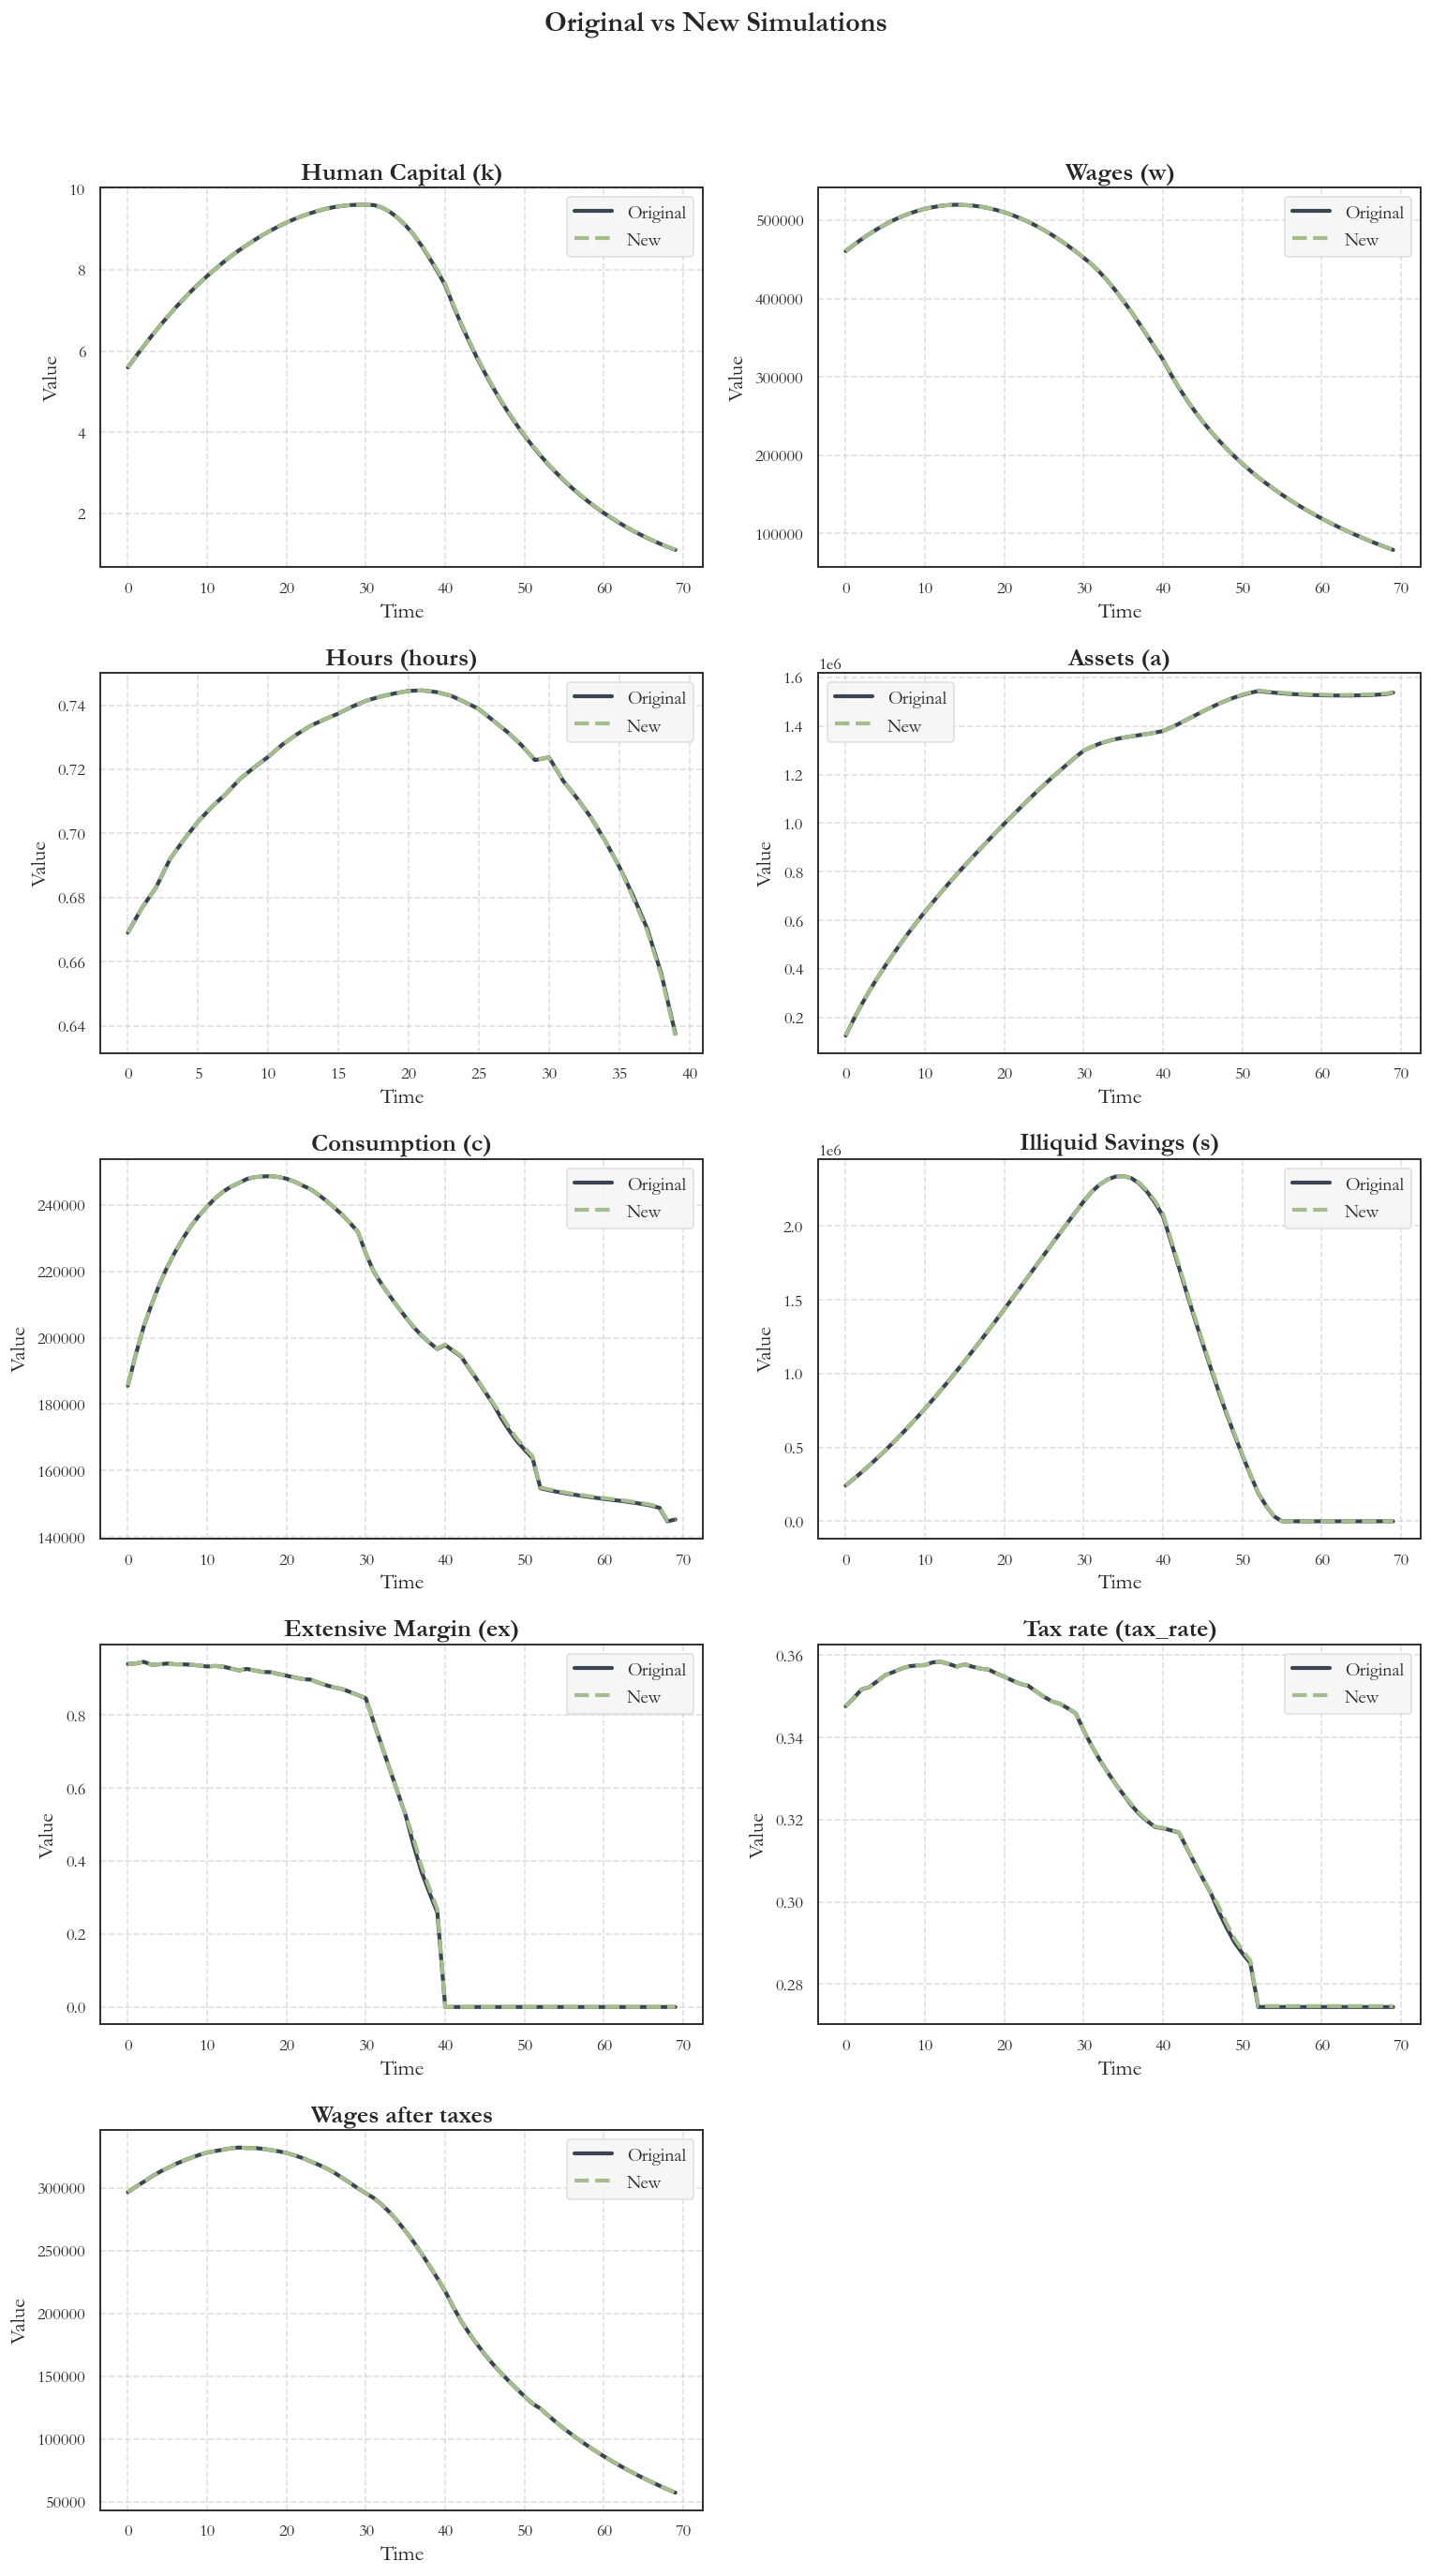

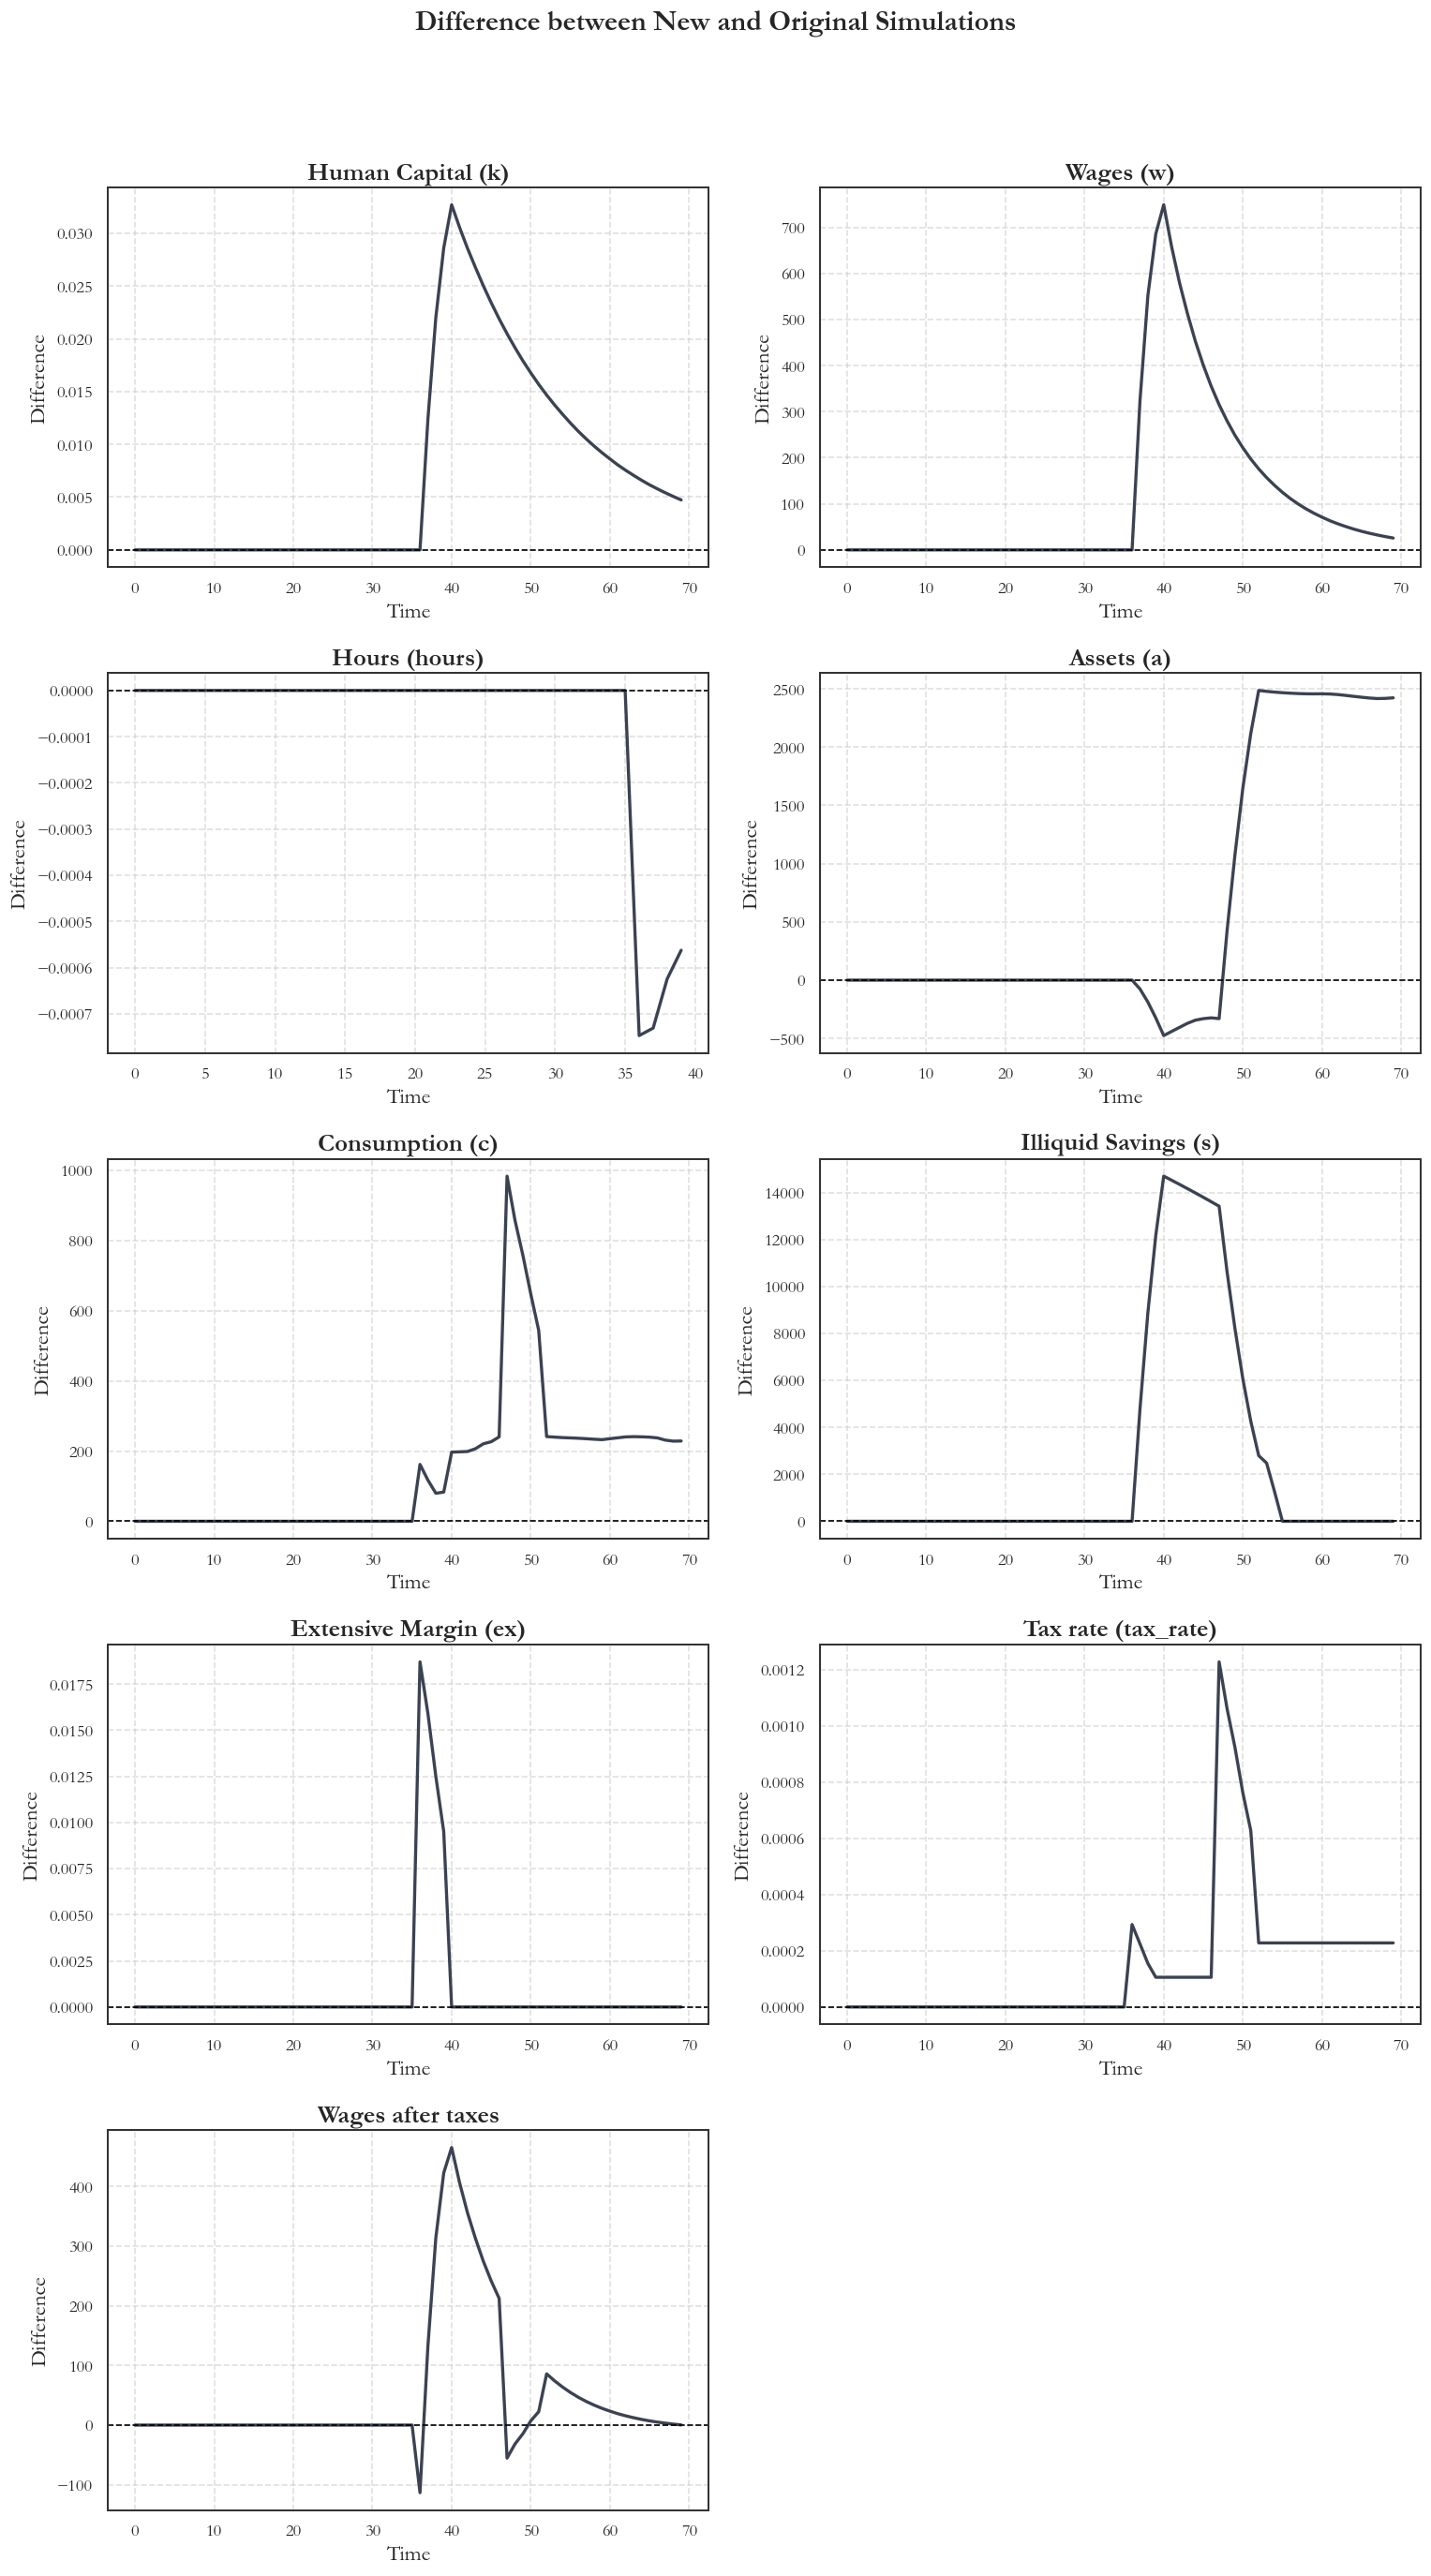

In [ ]:

# Full variable set
data_dict_new = {
    "Human Capital (k)": np.mean(new_model.sim.k[:], axis=0),
    "Wages (w)": np.mean(new_model.sim.w[:], axis=0),
    "Hours (hours)": np.nanmean(np.where(new_model.sim.ex == 1, new_model.sim.h, np.nan), axis=0),
    "Assets (a)": np.mean(new_model.sim.a[:], axis=0),
    "Consumption (c)": np.mean(new_model.sim.c[:], axis=0),
    "Illiquid Savings (s)": np.mean(new_model.sim.s[:], axis=0),
    "Extensive Margin (ex)": np.mean(new_model.sim.ex[:], axis=0),
    "Tax rate (tax_rate)": np.mean(new_model.sim.tax_rate[:,:], axis=0),
    "Wages after taxes": np.mean((1 - new_model.sim.tax_rate[:,:]) * new_model.sim.w[:,:], axis=0),
}

data_dict_og = {
    "Human Capital (k)": np.mean(og_model.sim.k[:], axis=0),
    "Wages (w)": np.mean(og_model.sim.w[:], axis=0),
    "Hours (hours)": np.nanmean(np.where(og_model.sim.ex == 1, og_model.sim.h, np.nan), axis=0),
    "Assets (a)": np.mean(og_model.sim.a[:], axis=0),
    "Consumption (c)": np.mean(og_model.sim.c[:], axis=0),
    "Illiquid Savings (s)": np.mean(og_model.sim.s[:], axis=0),
    "Extensive Margin (ex)": np.mean(og_model.sim.ex[:], axis=0),
    "Tax rate (tax_rate)": np.mean(og_model.sim.tax_rate[:,:], axis=0),
    "Wages after taxes": np.mean((1 - og_model.sim.tax_rate[:,:]) * og_model.sim.w[:,:], axis=0),
}

data_dict_diff = {
    "Human Capital (k)": np.mean(new_model.sim.k[:], axis=0) - np.mean(og_model.sim.k[:], axis=0),
    "Wages (w)": np.mean(new_model.sim.w[:], axis=0) - np.mean(og_model.sim.w[:], axis=0),
    "Hours (hours)": np.nanmean(np.where(new_model.sim.ex == 1, new_model.sim.h, np.nan), axis=0)
                    - np.nanmean(np.where(og_model.sim.ex == 1, og_model.sim.h, np.nan), axis=0),
    "Assets (a)": np.mean(new_model.sim.a[:], axis=0) - np.mean(og_model.sim.a[:], axis=0),
    "Consumption (c)": np.mean(new_model.sim.c[:], axis=0) - np.mean(og_model.sim.c[:], axis=0),
    "Illiquid Savings (s)": np.mean(new_model.sim.s[:], axis=0) - np.mean(og_model.sim.s[:], axis=0),
    "Extensive Margin (ex)": np.mean(new_model.sim.ex[:], axis=0) - np.mean(og_model.sim.ex[:], axis=0),
    "Tax rate (tax_rate)": np.mean(new_model.sim.tax_rate[:,:], axis=0) - np.mean(og_model.sim.tax_rate[:,:], axis=0),
    "Wages after taxes": (
        np.mean((1 - new_model.sim.tax_rate[:,:]) * new_model.sim.w[:,:], axis=0)
        - np.mean((1 - og_model.sim.tax_rate[:,:]) * og_model.sim.w[:,:], axis=0)
    ),
}

plot_comparison_grid(data_dict_og, data_dict_new, time, title="Original vs New Simulations", save_title="counterfactual_full_vars.png")
plot_difference_grid(data_dict_diff, time, title="Difference between New and Original Simulations", save_title="counterfactual_diff_full_vars.png")


In [ ]:
# 1. Find last time ex == 1 for each individual
last_working = np.full(og_model.sim.ex.shape[0], np.nan)  # initialize

for i in range(og_model.sim.ex.shape[0]):
    working = np.where(og_model.sim.ex[i, :] == 1)[0]  # find where ex=1
    if working.size > 0:
        last_working[i] = working[-1]  # last time they worked (take last index)

# 1. Find last time ex == 1 for each individual
last_working_new = np.full(new_model.sim.ex.shape[0], np.nan)  # initialize

for i in range(new_model.sim.ex.shape[0]):
    working_new = np.where(new_model.sim.ex[i, :] == 1)[0]  # find where ex=1
    if working_new.size > 0:
        last_working_new[i] = working_new[-1]  # last time they worked (take last index)


In [ ]:
plot_event_bar_series(
    values1=last_working,
    values2=last_working_new,
    xlabel="Retirement Age",
    title="Timing of Unofficial Retirement",
    label1="Old",
    label2=f'New',
    save_title="counterfactual_retirement_age.png",
)


In [ ]:
# 1. Find first time e == 2 for each individual
first_retirement = np.full(og_model.sim.e.shape[0], np.nan)  # initialize

for i in range(og_model.sim.e.shape[0]):
    retired = np.where(og_model.sim.e[i, :] == 2)[0]  # find where e=2
    if retired.size > 0:
        first_retirement[i] = retired[0]  # first time they retire

first_retirement_new = np.full(new_model.sim.e.shape[0], np.nan)  # initialize

for i in range(new_model.sim.e.shape[0]):
    retired_new = np.where(new_model.sim.e[i, :] == 2)[0]  # find where e=2
    if retired_new.size > 0:
        first_retirement_new[i] = retired_new[0]  # first time they retire
plot_event_bar_series(
    values1=first_retirement,
    values2=first_retirement_new,
    xlabel="Official Retirement Age",
    title="Timing of Official Retirement",
    label1="Old",
    label2=f'New',
    save_title="counterfactual_official_retirement_age.png",
)


In [ ]:
og_ret_counts = np.sum(og_model.sim.ret_flag[:, :], axis=0)
new_ret_counts = np.sum(new_model.sim.ret_flag[:, :], axis=0)
plot_bar_series_comparison(
    og_ret_counts,
    new_ret_counts,
    label1="Old",
    label2=f"New",
    title="Voluntary Retirements per Period",
    xlabel="Age (Period)",
    normalize=True,
    save_title="counterfactual_retirement_counts.png",
)


In [ ]:
plot_event_histogram(
    values1=consumption_replacement_rate_fct(og_model),
    values2=consumption_replacement_rate_fct(new_model),
    xlabel="Age (Period)",
    title="Consumption Replacement Rate",
    label1="Old",
    label2=f'New',
    bins=30,
    save_title="counterfactual_consumption_replacement_histogram.png",
)

In [ ]:
plot_event_histogram(
    values1=replacement_rate_fct(og_model),
    values2=replacement_rate_fct(new_model),
    xlabel="Age (Period)",
    title="Replacement Rate",
    label1="Old",
    label2=f'New',
    bins=30,
    save_title="counterfactual_consumption_replacement_histogram.png",
)

# Comparison of retirement age

# replacement rates

In [ ]:
assert False